In [1]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


# problem statement
#(1)customer Segmentaion(clustering)on the basis of their buying pattern(recency,frecuency,monetary)
(2)identify the business trend-Day,Month,season,time by invoice count.
(3)

In [2]:
# import basic library
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [3]:
#os.getcwd()

In [4]:
# import the dataset
data=pd.read_excel('online_shopping.xlsx')


In [5]:
df=data.copy()

In [6]:
df.head()

,InvoiceNo,StockCode,lower,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
df.shape

(541909, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   lower        1816 non-null    object        
 3   Description  540455 non-null  object        
 4   Quantity     541909 non-null  int64         
 5   InvoiceDate  541909 non-null  datetime64[ns]
 6   UnitPrice    541909 non-null  float64       
 7   CustomerID   406829 non-null  float64       
 8   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 37.2+ MB


In [9]:
# check number of unique (CustomerID,StockCode)
df.nunique()

InvoiceNo      25900
StockCode       4070
lower            953
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [10]:
# Check missing data, total number of percent
df.isnull().sum()/len(df)*100

InvoiceNo       0.000000
StockCode       0.000000
lower          99.664888
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [11]:
# this solve the first problem statement (clustering)
# RFM. we drop unwanted columns

In [12]:
df1=df.drop(['StockCode','lower','Description','Country'],axis=1)


In [13]:
df1.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,6,2010-12-01 08:26:00,2.55,17850.0
1,536365,6,2010-12-01 08:26:00,3.39,17850.0
2,536365,8,2010-12-01 08:26:00,2.75,17850.0
3,536365,6,2010-12-01 08:26:00,3.39,17850.0
4,536365,6,2010-12-01 08:26:00,3.39,17850.0


In [14]:
df1.isnull().sum()

InvoiceNo           0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
dtype: int64

In [15]:
# we cannot impute customer id as we are working on cusomer clustering
#

In [16]:
df1.dropna(axis=0,inplace=True)

In [17]:
df1.isnull().sum()

InvoiceNo      0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
dtype: int64

In [18]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,406829.0,12.061303,248.693370,-80995.0,2.00,5.00,12.00,80995.0
UnitPrice,406829.0,3.460471,69.315162,0.0,1.25,1.95,3.75,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.0,13953.00,15152.00,16791.00,18287.0


In [19]:
# the quantity is can be negative because of return or defective iteam
#unit price can be 0 because of offers


In [20]:
df1[df1["UnitPrice"] == 0]['UnitPrice'].count()


40

In [21]:
# we want to continue with only those observation having positive

In [22]:
df1[df1["UnitPrice"] > 0]["UnitPrice"].count()

406789

In [23]:
df1[df1["Quantity"] > 0]

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,6,2010-12-01 08:26:00,2.55,17850.0
1,536365,6,2010-12-01 08:26:00,3.39,17850.0
2,536365,8,2010-12-01 08:26:00,2.75,17850.0
3,536365,6,2010-12-01 08:26:00,3.39,17850.0
4,536365,6,2010-12-01 08:26:00,3.39,17850.0
...,...,...,...,...,...
541904,581587,12,2011-12-09 12:50:00,0.85,12680.0
541905,581587,6,2011-12-09 12:50:00,2.10,12680.0
541906,581587,4,2011-12-09 12:50:00,4.15,12680.0
541907,581587,4,2011-12-09 12:50:00,4.15,12680.0


In [24]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,406829.0,12.061303,248.693370,-80995.0,2.00,5.00,12.00,80995.0
UnitPrice,406829.0,3.460471,69.315162,0.0,1.25,1.95,3.75,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.0,13953.00,15152.00,16791.00,18287.0


In [25]:
df1.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,6,2010-12-01 08:26:00,2.55,17850.0
1,536365,6,2010-12-01 08:26:00,3.39,17850.0
2,536365,8,2010-12-01 08:26:00,2.75,17850.0
3,536365,6,2010-12-01 08:26:00,3.39,17850.0
4,536365,6,2010-12-01 08:26:00,3.39,17850.0


In [26]:
df1['total']=df1['Quantity']*df['UnitPrice']# generate total price

In [27]:
df1.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,total
0,536365,6,2010-12-01 08:26:00,2.55,17850.0,15.30
1,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34
2,536365,8,2010-12-01 08:26:00,2.75,17850.0,22.00
3,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34
4,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34


In [28]:
# we can drop quantity , unit price not requared

In [29]:

df2 = df1.drop(['Quantity', 'UnitPrice'], axis=1)
df2.head(100)

,InvoiceNo,InvoiceDate,CustomerID,total
0,536365,2010-12-01 08:26:00,17850.0,15.30
1,536365,2010-12-01 08:26:00,17850.0,20.34
2,536365,2010-12-01 08:26:00,17850.0,22.00
3,536365,2010-12-01 08:26:00,17850.0,20.34
4,536365,2010-12-01 08:26:00,17850.0,20.34
...,...,...,...,...
95,536378,2010-12-01 09:37:00,14688.0,15.30
96,536378,2010-12-01 09:37:00,14688.0,50.40
97,536378,2010-12-01 09:37:00,14688.0,13.20
98,536378,2010-12-01 09:37:00,14688.0,13.20


In [30]:
# groupby approach

In [31]:
df_final=df2.groupby(['InvoiceNo','InvoiceDate','CustomerID']).agg({'total':'sum'}).reset_index()


In [32]:
df_final

,InvoiceNo,InvoiceDate,CustomerID,total
0,536365,2010-12-01 08:26:00,17850.0,139.12
1,536366,2010-12-01 08:28:00,17850.0,22.20
2,536367,2010-12-01 08:34:00,13047.0,278.73
3,536368,2010-12-01 08:34:00,13047.0,70.05
4,536369,2010-12-01 08:35:00,13047.0,17.85
...,...,...,...,...
22216,C581484,2011-12-09 09:27:00,16446.0,-168469.60
22217,C581490,2011-12-09 09:57:00,14397.0,-32.53
22218,C581499,2011-12-09 10:28:00,15498.0,-224.69
22219,C581568,2011-12-09 11:57:00,15311.0,-54.75


In [33]:
# now we want to calculate Recency,Frecuency,Monetary
# Recency=(last business date as per record) -last purchased date (of partucular customer)
# Frecuency=counting invoice number with respect to a partucular customer
# Monitary=Summation of total

In [34]:
# we will use groupby--keeping customer_id as reference

In [35]:
# calcualte the last business date as per dataset

In [36]:
max(df_final['InvoiceDate'])

Timestamp('2011-12-09 12:50:00')

In [37]:
min(df_final['InvoiceDate'])

Timestamp('2010-12-01 08:26:00')

In [38]:
# last business date as per dataset=2011-12-09 12:50:00
# we have 12 month of data(approax)

In [39]:
# basically we want the recency in days--not in hour, minute etc..

latest_date or date of business--if we add 1 day extra the recency will be only in days not in hour or minutes


In [40]:
import datetime as dt
latest_date=dt.datetime(2011,12,10)
latest_date

datetime.datetime(2011, 12, 10, 0, 0)

In [41]:
df_final.head()

,InvoiceNo,InvoiceDate,CustomerID,total
0,536365,2010-12-01 08:26:00,17850.0,139.12
1,536366,2010-12-01 08:28:00,17850.0,22.20
2,536367,2010-12-01 08:34:00,13047.0,278.73
3,536368,2010-12-01 08:34:00,13047.0,70.05
4,536369,2010-12-01 08:35:00,13047.0,17.85


In [42]:
# we will use groupby--keeping customer_id as reference

In [43]:
RFM_score=df_final.groupby('CustomerID').agg({'InvoiceDate':lambda x:(latest_date-x.max()).days,"InvoiceNo":lambda x:x.count(),"total": lambda x:x.sum()}).reset_index()


In [44]:
RFM_score.head()

,CustomerID,InvoiceDate,InvoiceNo,total
0,12346.0,325,2,0.00
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,310,1,334.40


In [45]:
# lets rename

In [46]:
RFM_score = RFM_score.rename(columns={"InvoiceDate": "Recency", "InvoiceNo": "Frequency", "total": "Monetary"})


In [47]:
RFM_score.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,2,0.00
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,310,1,334.40


In [48]:
RFM_score.shape

(4372, 4)

In [49]:
# lets find the marks on basis on ranking in individual R F M

In [50]:
RFM_score["R_marks"]=RFM_score['Recency'].rank(ascending=False)
RFM_score["R_marks"]

0        169.0
1       4171.0
2       1642.5
3       3177.5
4        238.0
         ...  
4367     365.0
4368     864.0
4369    3829.0
4370    4067.0
4371    2349.0
Name: R_marks, Length: 4372, dtype: float64

In [51]:
# Frequency mark with respect to rank
RFM_score["F_marks"]=RFM_score['Frequency'].rank(ascending=False)
RFM_score["F_marks"]

0       2652.0
1        814.0
2       1566.5
3       3717.0
4       3717.0
         ...  
4367    3717.0
4368    3717.0
4369    1998.0
4370     227.5
4371    1998.0
Name: F_marks, Length: 4372, dtype: float64

In [52]:
RFM_score["M_marks"]=RFM_score['Monetary'].rank(ascending=False)

In [53]:
RFM_score["M_marks"]

0       4325.5
1        319.0
2        979.0
3       1007.0
4       3076.0
         ...  
4367    3748.0
4368    4214.0
4369    3774.0
4370     829.0
4371     959.0
Name: M_marks, Length: 4372, dtype: float64

In [54]:
RFM=RFM_score.copy()

In [55]:
RFM.head()

,CustomerID,Recency,Frequency,Monetary,R_marks,F_marks,M_marks
0,12346.0,325,2,0.00,169.0,2652.0,4325.5
1,12347.0,2,7,4310.00,4171.0,814.0,319.0
2,12348.0,75,4,1797.24,1642.5,1566.5,979.0
3,12349.0,18,1,1757.55,3177.5,3717.0,1007.0
4,12350.0,310,1,334.40,238.0,3717.0,3076.0


In [56]:
# lets convert the marks with respetc to 100 marks

In [57]:
RFM["R_final"]=(RFM["R_marks"]/RFM["R_marks"].max())*100

In [58]:
RFM.head()

,CustomerID,Recency,Frequency,Monetary,R_marks,F_marks,M_marks,R_final
0,12346.0,325,2,0.00,169.0,2652.0,4325.5,3.881934
1,12347.0,2,7,4310.00,4171.0,814.0,319.0,95.807971
2,12348.0,75,4,1797.24,1642.5,1566.5,979.0,37.728265
3,12349.0,18,1,1757.55,3177.5,3717.0,1007.0,72.987252
4,12350.0,310,1,334.40,238.0,3717.0,3076.0,5.466866


In [59]:
RFM["F_final"]=(RFM["F_marks"]/RFM["F_marks"].max())*100

In [60]:
RFM["M_final"]=(RFM["M_marks"]/RFM["M_marks"].max())*100

In [61]:
RFM.head()

,CustomerID,Recency,Frequency,Monetary,R_marks,F_marks,M_marks,R_final,F_final,M_final
0,12346.0,325,2,0.00,169.0,2652.0,4325.5,3.881934,71.347861,98.936414
1,12347.0,2,7,4310.00,4171.0,814.0,319.0,95.807971,21.899381,7.296432
2,12348.0,75,4,1797.24,1642.5,1566.5,979.0,37.728265,42.144202,22.392498
3,12349.0,18,1,1757.55,3177.5,3717.0,1007.0,72.987252,100.000000,23.032937
4,12350.0,310,1,334.40,238.0,3717.0,3076.0,5.466866,100.000000,70.356816


In [62]:
# creamos new_column name
RFM["RFM_final"]=0.20*RFM["R_final"]+0.30*RFM["F_final"]+0.50*RFM["M_final"]


In [63]:
RFM=RFM.round(2)
RFM.head(10)

,CustomerID,Recency,Frequency,Monetary,R_marks,F_marks,M_marks,R_final,F_final,M_final,RFM_final
0,12346.0,325,2,0.00,169.0,2652.0,4325.5,3.88,71.35,98.94,71.65
1,12347.0,2,7,4310.00,4171.0,814.0,319.0,95.81,21.90,7.30,29.38
2,12348.0,75,4,1797.24,1642.5,1566.5,979.0,37.73,42.14,22.39,31.39
3,12349.0,18,1,1757.55,3177.5,3717.0,1007.0,72.99,100.00,23.03,56.11
4,12350.0,310,1,334.40,238.0,3717.0,3076.0,5.47,100.00,70.36,66.27
5,12352.0,36,11,1545.41,2484.0,431.0,1130.0,57.06,11.60,25.85,27.81
6,12353.0,204,1,89.00,732.0,3717.0,4199.0,16.81,100.00,96.04,81.38
7,12354.0,232,1,1079.40,611.0,3717.0,1530.0,14.03,100.00,35.00,50.30
8,12355.0,214,1,459.40,680.5,3717.0,2642.0,15.63,100.00,60.43,63.34
9,12356.0,22,3,2811.43,3009.5,1998.0,582.0,69.13,53.75,13.31,36.61


In [64]:
# lets we want to create 4 groups 

In [65]:
loyalty_label=["Silver","Gold","Diamond","Platinum"]

In [66]:
Quantal=RFM["RFM_final"].quantile(q=[0.25,0.50,0.75])

In [67]:
Quantal

0.25    34.7975
0.50    53.1350
0.75    70.5950
Name: RFM_final, dtype: float64

In [68]:
# lets visualaze the percentile to decide the quantile
# ecdf --empirical cumulative distribution plot

<AxesSubplot:xlabel='RFM_final', ylabel='Proportion'>

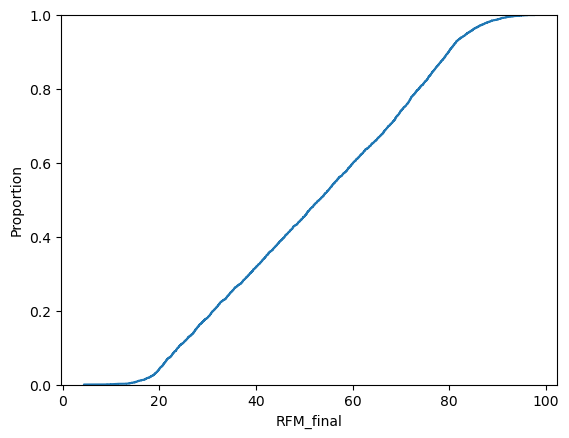

In [69]:
sns.ecdfplot(data=RFM["RFM_final"])

In [70]:
# write a function to assign the customer in differernt group as per their marks and quantile approach



In [71]:
def loyalty(x):
    if x<=31:
        return"Silver"
    elif x<=54:
        return"Gold"
    elif x<=78:
        return"Diamond"
    else:
        return"Platinum"

In [72]:
RFM["Loyalty"]=RFM["RFM_final"].apply(loyalty)

In [73]:
RFM.head(100)

,CustomerID,Recency,Frequency,Monetary,R_marks,F_marks,M_marks,R_final,F_final,M_final,RFM_final,Loyalty
0,12346.0,325,2,0.00,169.0,2652.0,4325.5,3.88,71.35,98.94,71.65,Diamond
1,12347.0,2,7,4310.00,4171.0,814.0,319.0,95.81,21.90,7.30,29.38,Silver
2,12348.0,75,4,1797.24,1642.5,1566.5,979.0,37.73,42.14,22.39,31.39,Gold
3,12349.0,18,1,1757.55,3177.5,3717.0,1007.0,72.99,100.00,23.03,56.11,Diamond
4,12350.0,310,1,334.40,238.0,3717.0,3076.0,5.47,100.00,70.36,66.27,Diamond
...,...,...,...,...,...,...,...,...,...,...,...,...
95,12462.0,2,4,1124.01,4171.0,1566.5,1480.0,95.81,42.14,33.85,48.73,Gold
96,12463.0,46,7,1303.63,2240.5,814.0,1325.0,51.46,21.90,30.31,32.02,Gold
97,12464.0,10,8,1212.05,3567.0,678.5,1403.0,81.93,18.25,32.09,37.91,Gold
98,12465.0,7,3,733.89,3829.0,1998.0,2002.0,87.95,53.75,45.79,56.61,Diamond


In [74]:
RFM["Loyalty"].value_counts()

Diamond     1564
Gold        1372
Silver       864
Platinum     572
Name: Loyalty, dtype: int64

In [75]:
# we can do the customer segmentation with kmeans clustering algoritm

In [76]:
Newdata=RFM["RFM_final"]
Newdata


0       71.65
1       29.38
2       31.39
3       56.11
4       66.27
        ...  
4367    74.54
4368    82.16
4369    76.88
4370    30.00
4371    37.88
Name: RFM_final, Length: 4372, dtype: float64

In [77]:
new_data=pd.DataFrame(Newdata)
new_data

,RFM_final
0,71.65
1,29.38
2,31.39
3,56.11
4,66.27
...,...
4367,74.54
4368,82.16
4369,76.88
4370,30.00


In [78]:
from sklearn.cluster import KMeans

In [79]:
kmeans1=KMeans(n_clusters=4,max_iter=100,random_state=100)

In [80]:
y_kmeans=kmeans1.fit_predict(new_data)
y_kmeans

array([2, 1, 1, ..., 2, 1, 3], dtype=int32)

In [81]:
RFM.head()

,CustomerID,Recency,Frequency,Monetary,R_marks,F_marks,M_marks,R_final,F_final,M_final,RFM_final,Loyalty
0,12346.0,325,2,0.00,169.0,2652.0,4325.5,3.88,71.35,98.94,71.65,Diamond
1,12347.0,2,7,4310.00,4171.0,814.0,319.0,95.81,21.90,7.30,29.38,Silver
2,12348.0,75,4,1797.24,1642.5,1566.5,979.0,37.73,42.14,22.39,31.39,Gold
3,12349.0,18,1,1757.55,3177.5,3717.0,1007.0,72.99,100.00,23.03,56.11,Diamond
4,12350.0,310,1,334.40,238.0,3717.0,3076.0,5.47,100.00,70.36,66.27,Diamond


In [82]:
RFM["Cluster"]=kmeans1.labels_

In [83]:
RFM["Cluster"].value_counts()

2    1119
1    1094
3    1081
0    1078
Name: Cluster, dtype: int64

In [84]:
RFM["Loyalty"].value_counts()

Diamond     1564
Gold        1372
Silver       864
Platinum     572
Name: Loyalty, dtype: int64

In [85]:
# how to find the best no. of cluster----elbow method---sse error calculate

# calculate the silhoute score

In [86]:
# find no of clusters

In [87]:
from sklearn.cluster import KMeans


Text(0, 0.5, 'sum of square error')

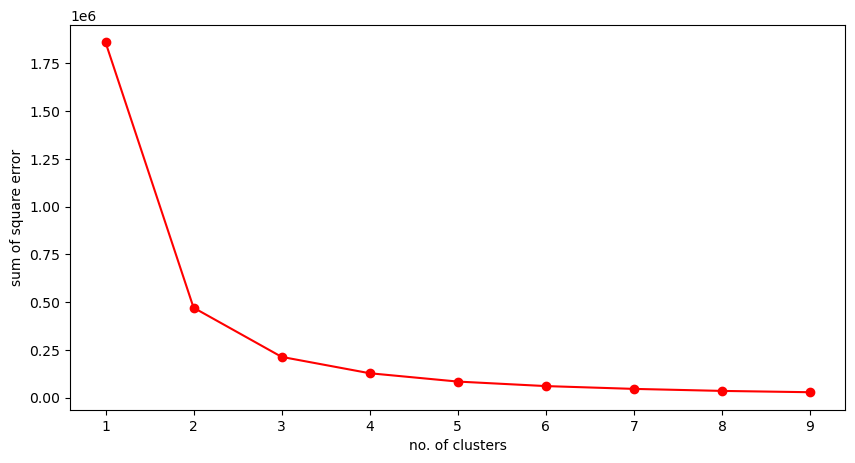

In [88]:
SSE=[]
for i in range (1,10):
    km=KMeans(n_clusters=i, max_iter=500)
    km.fit(new_data)
    # append SSE
    SSE.append(km.inertia_)
# plot the graph -- elbow approach  x axis- no. of cluster, Y axis-- SSE

plt.figure(figsize=(10,5))
plt.plot(range (1,10),SSE,color = 'r',marker='o')
plt.xlabel("no. of clusters")
plt.ylabel("sum of square error")

    



In [89]:
# another method to find best number of cluster

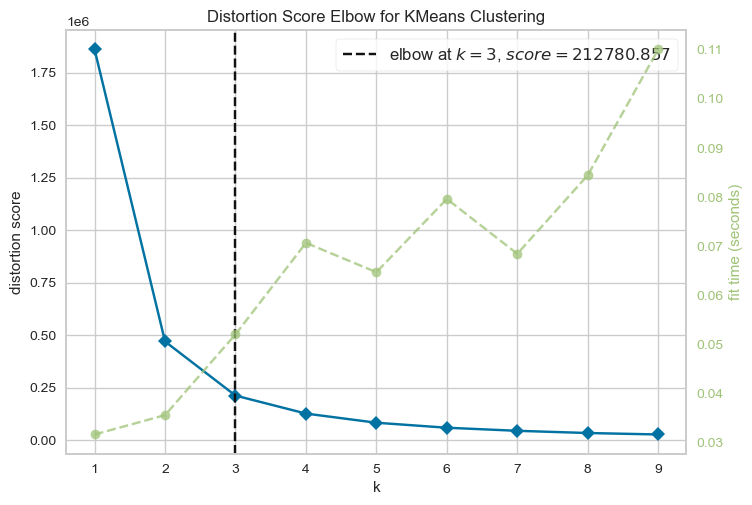

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [90]:

from yellowbrick.cluster import KElbowVisualizer
model=km
visualizer=KElbowVisualizer(model,k=(1,10)).fit(new_data)
visualizer.show()

In [91]:
# as per the elbow method --we found that no. of best clusters = 3

In [92]:
km1=KMeans(n_clusters=3)
km1.fit(new_data)
y=km1.predict(new_data)
RFM['Label']=y
RFM.head(100)

,CustomerID,Recency,Frequency,Monetary,R_marks,F_marks,M_marks,R_final,F_final,M_final,RFM_final,Loyalty,Cluster,Label
0,12346.0,325,2,0.00,169.0,2652.0,4325.5,3.88,71.35,98.94,71.65,Diamond,2,0
1,12347.0,2,7,4310.00,4171.0,814.0,319.0,95.81,21.90,7.30,29.38,Silver,1,2
2,12348.0,75,4,1797.24,1642.5,1566.5,979.0,37.73,42.14,22.39,31.39,Gold,1,2
3,12349.0,18,1,1757.55,3177.5,3717.0,1007.0,72.99,100.00,23.03,56.11,Diamond,0,1
4,12350.0,310,1,334.40,238.0,3717.0,3076.0,5.47,100.00,70.36,66.27,Diamond,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,12462.0,2,4,1124.01,4171.0,1566.5,1480.0,95.81,42.14,33.85,48.73,Gold,3,1
96,12463.0,46,7,1303.63,2240.5,814.0,1325.0,51.46,21.90,30.31,32.02,Gold,1,2
97,12464.0,10,8,1212.05,3567.0,678.5,1403.0,81.93,18.25,32.09,37.91,Gold,3,2
98,12465.0,7,3,733.89,3829.0,1998.0,2002.0,87.95,53.75,45.79,56.61,Diamond,0,1


In [93]:
RFM['Label'].value_counts()

0    1553
1    1443
2    1376
Name: Label, dtype: int64

In [94]:
# evaluate the cluster use silhoutte score (-1 to +1) most of time it will be 0 to 1
# around 0.5 conssidere as good cluster
# it is around 0,that means there is some overlapping


In [95]:
from sklearn.metrics import silhouette_score

In [96]:
silhouette_score(new_data,km1.labels_)

0.590950774120662

In [97]:
cust0=RFM[RFM["Label"]==0]
print("the customer in  group 0 are ",cust0["CustomerID"].values)

the customer in  group 0 are  [12346. 12350. 12353. ... 18280. 18281. 18282.]


In [98]:
cust1=RFM[RFM["Label"]==1]
print("the customer in  group 0 are ",cust1["CustomerID"].values)

the customer in  group 0 are  [12349. 12354. 12355. ... 18252. 18263. 18265.]


In [99]:
cust2=RFM[RFM["Label"]==2]
print("the customer in  group 0 are ",cust2["CustomerID"].values)

the customer in  group 0 are  [12347. 12348. 12352. ... 18272. 18283. 18287.]


In [100]:
# goal no. 2---analysing of business trend as per day, month,weekend,season,
# timing etc....


In [101]:
df10=data.copy()

In [102]:
df10.head()

,InvoiceNo,StockCode,lower,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [103]:
df10=df10.drop(["StockCode","Description","lower","Country"],axis=1)

In [104]:
df10.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,6,2010-12-01 08:26:00,2.55,17850.0
1,536365,6,2010-12-01 08:26:00,3.39,17850.0
2,536365,8,2010-12-01 08:26:00,2.75,17850.0
3,536365,6,2010-12-01 08:26:00,3.39,17850.0
4,536365,6,2010-12-01 08:26:00,3.39,17850.0


In [105]:
df10['Total']=df10['Quantity']*df10['UnitPrice']

In [106]:
df10=df10.drop(['Quantity','UnitPrice'],axis=1)

In [107]:
df10.head(2)

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536365,2010-12-01 08:26:00,17850.0,15.30
1,536365,2010-12-01 08:26:00,17850.0,20.34


In [108]:
df10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   InvoiceDate  541909 non-null  datetime64[ns]
 2   CustomerID   406829 non-null  float64       
 3   Total        541909 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 16.5+ MB


In [109]:
import datetime as dt

In [110]:
# extraction of day
df10['day']=df10['InvoiceDate'].dt.day_name()

In [111]:
df10.head()

,InvoiceNo,InvoiceDate,CustomerID,Total,day
0,536365,2010-12-01 08:26:00,17850.0,15.30,Wednesday
1,536365,2010-12-01 08:26:00,17850.0,20.34,Wednesday
2,536365,2010-12-01 08:26:00,17850.0,22.00,Wednesday
3,536365,2010-12-01 08:26:00,17850.0,20.34,Wednesday
4,536365,2010-12-01 08:26:00,17850.0,20.34,Wednesday


In [112]:
df10['day'].value_counts()

Thursday     103857
Tuesday      101808
Monday        95111
Wednesday     94565
Friday        82193
Sunday        64375
Name: day, dtype: int64

In [113]:
# extraction of month

In [114]:
#df10['month']=df10['InvoiceDate'].dt.month_name()

In [115]:
df10['month']=df10['InvoiceDate'].dt.month

In [116]:
df10['hour']=df10['InvoiceDate'].dt.hour

In [117]:
df10.head()

,InvoiceNo,InvoiceDate,CustomerID,Total,day,month,hour
0,536365,2010-12-01 08:26:00,17850.0,15.30,Wednesday,12,8
1,536365,2010-12-01 08:26:00,17850.0,20.34,Wednesday,12,8
2,536365,2010-12-01 08:26:00,17850.0,22.00,Wednesday,12,8
3,536365,2010-12-01 08:26:00,17850.0,20.34,Wednesday,12,8
4,536365,2010-12-01 08:26:00,17850.0,20.34,Wednesday,12,8


In [118]:
#creation of season on the basis of month

In [119]:
def cal_season(x):
    if x in [10,11,12,1]:
        return 'Winter'
    if x in [2,3]:
        return 'Spring'
    if x in [4,5,6]:
        return 'Summer'
    else:
        return 'Monsoon'
    

In [120]:
#creation of season on the basis of hour

In [121]:
def cal_timing(x):
    if x in range (0,5):
        return 'Early morning'
    if x in range(5,11):
        return 'Morning'
    if x in range (11,16):
        return 'Afternoon'
    else:
        return 'Evening'

In [122]:
df10['season']=df10['month'].apply(cal_season)

In [123]:
df10['timing'] = df10['hour'].apply(cal_timing)

In [124]:
#create weekend column

In [125]:
df10['weekend']=np.where((df10.day=="Saturday")|(df10.day=="Sunday"),"Weekend","Weekday")

In [126]:
df10.head()

,InvoiceNo,InvoiceDate,CustomerID,Total,day,month,hour,season,timing,weekend
0,536365,2010-12-01 08:26:00,17850.0,15.30,Wednesday,12,8,Winter,Morning,Weekday
1,536365,2010-12-01 08:26:00,17850.0,20.34,Wednesday,12,8,Winter,Morning,Weekday
2,536365,2010-12-01 08:26:00,17850.0,22.00,Wednesday,12,8,Winter,Morning,Weekday
3,536365,2010-12-01 08:26:00,17850.0,20.34,Wednesday,12,8,Winter,Morning,Weekday
4,536365,2010-12-01 08:26:00,17850.0,20.34,Wednesday,12,8,Winter,Morning,Weekday


In [127]:
# analysing the most busy day

In [128]:
day_count=df10.groupby('day')['InvoiceNo'].count().to_frame('no. of invoices').reset_index()
day_count

,day,no. of invoices
0,Friday,82193
1,Monday,95111
2,Sunday,64375
3,Thursday,103857
4,Tuesday,101808
5,Wednesday,94565


In [129]:
# creation of pieplot

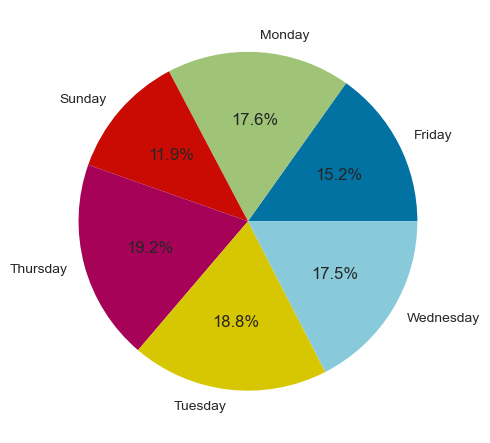

In [130]:
import matplotlib.pyplot as plt

plt.pie(day_count['no. of invoices'], labels=day_count['day'], autopct='%.1f%%')
plt.show()

<AxesSubplot:xlabel='day', ylabel='no. of invoices'>

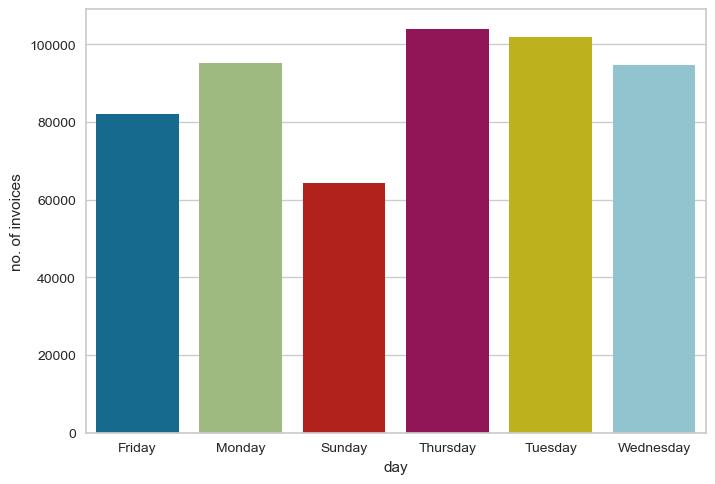

In [131]:
sns.barplot(x=day_count.day, y = day_count['no. of invoices'])

In [132]:
season_count=df10.groupby('season')['InvoiceNo'].count().to_frame('no. of invoices').reset_index()
season_count

,season,no. of invoices
0,Monsoon,125028
1,Spring,64455
2,Summer,103820
3,Winter,248606


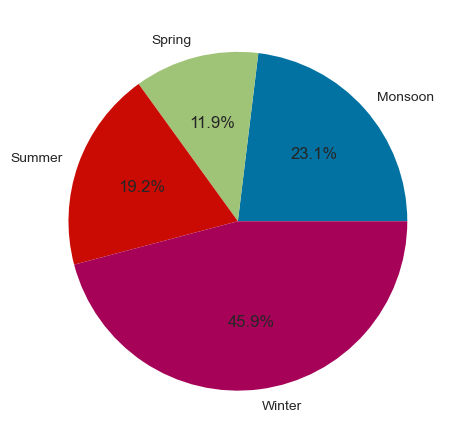

In [133]:

plt.pie(season_count['no. of invoices'], labels=season_count['season'], autopct='%.1f%%')
plt.show()


<AxesSubplot:xlabel='season', ylabel='no. of invoices'>

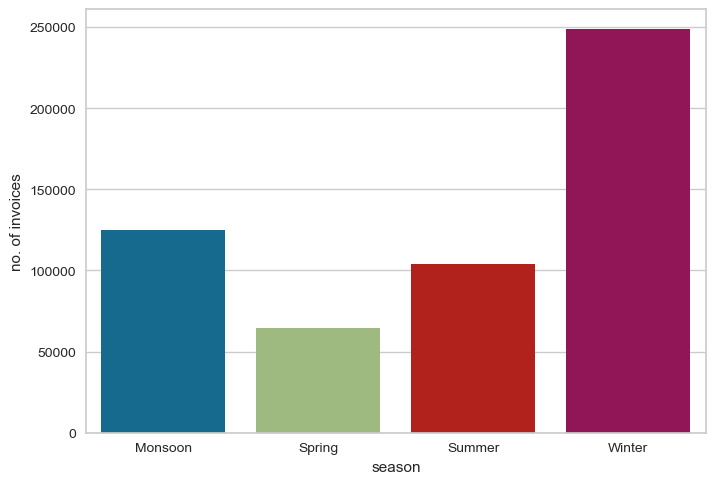

In [134]:
sns.barplot(x=season_count.season, y = season_count['no. of invoices'])

In [135]:
timing_count=df10.groupby('timing')['InvoiceNo'].count().to_frame('no. of invoices').reset_index()
timing_count

,timing,no. of invoices
0,Afternoon,353632
1,Evening,95575
2,Morning,92702


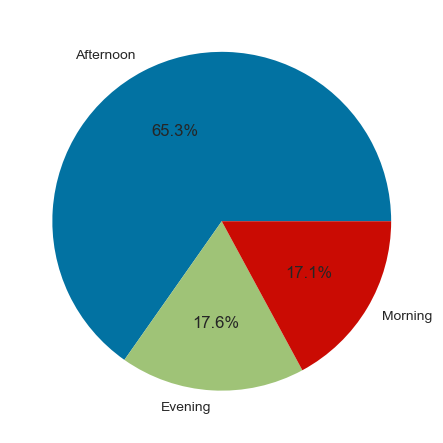

In [136]:
plt.pie(timing_count['no. of invoices'], labels=timing_count['timing'], autopct='%.1f%%')
plt.show()

In [137]:
# time series Revenue


In [138]:
df10['Total'].head()

0    15.30
1    20.34
2    22.00
3    20.34
4    20.34
Name: Total, dtype: float64

In [139]:
montly_revenue=df10.set_index('InvoiceDate')["Total"].resample('M').sum()


In [140]:
montly_revenue

InvoiceDate
2010-12-31     748957.020
2011-01-31     560000.260
2011-02-28     498062.650
2011-03-31     683267.080
2011-04-30     493207.121
2011-05-31     723333.510
2011-06-30     691123.120
2011-07-31     681300.111
2011-08-31     682680.510
2011-09-30    1019687.622
2011-10-31    1070704.670
2011-11-30    1461756.250
2011-12-31     433668.010
Freq: M, Name: Total, dtype: float64

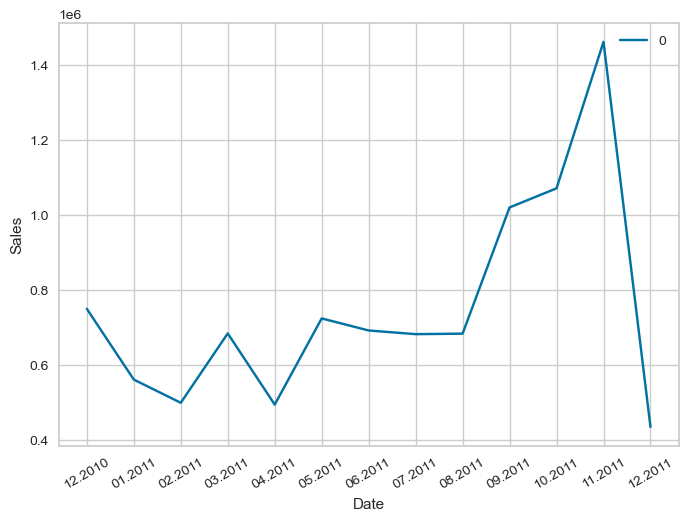

In [141]:
ax=pd.DataFrame(montly_revenue.values).plot()
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.xticks(range(len(montly_revenue.index)),[x.strftime('%m.%Y')for x in montly_revenue.index],rotation=30)
plt.show()



In [142]:
df20=df1.copy()

In [143]:
df20=df20.drop(['Quantity','UnitPrice'],axis=1)

In [144]:
df20.head()

,InvoiceNo,InvoiceDate,CustomerID,total
0,536365,2010-12-01 08:26:00,17850.0,15.30
1,536365,2010-12-01 08:26:00,17850.0,20.34
2,536365,2010-12-01 08:26:00,17850.0,22.00
3,536365,2010-12-01 08:26:00,17850.0,20.34
4,536365,2010-12-01 08:26:00,17850.0,20.34


In [145]:
# Repeat customers information
repeat_customers=df20.groupby('CustomerID')['InvoiceNo'].count().to_frame('no. of invoices').reset_index()

repeat_customers = repeat_customers[repeat_customers['no. of invoices'] > 1]

repeat_customers 

,CustomerID,no. of invoices
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4367,18280.0,10
4368,18281.0,7
4369,18282.0,13
4370,18283.0,756


In [152]:
# Calculate Repeat Customer Revenue
repeat_customer_revenue = df20[df20['CustomerID'].isin(repeat_customers['CustomerID'])]['total'].sum()
print('Total repeat customer revenue:',repeat_customer_revenue)

# Calculate Total Revenue
total_revenue = df20['total'].sum()
print('Total revenue:', total_revenue)

# Calculate Percentage of Business from Repeat Customers
percentage_repeat_customers = (repeat_customer_revenue / total_revenue) * 100
print(f"Percentage of Business from Repeat Customers: {percentage_repeat_customers:.2f}%")


Total repeat customer revenue: 8289731.013999999
Total revenue: 8300065.814000001
Percentage of Business from Repeat Customers: 99.88%


In [155]:
# Data for the bar plot
categories = ['Repeat Customer Revenue', 'Total Revenue']
revenue_values = [repeat_customer_revenue, total_revenue]

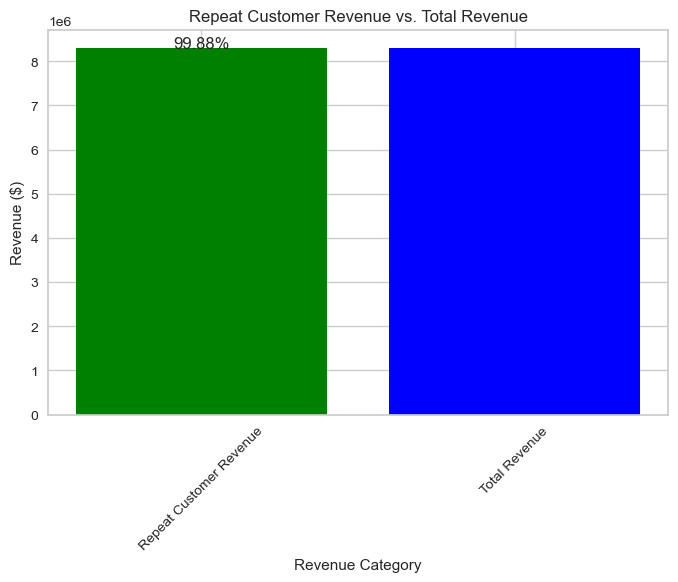

In [156]:
plt.figure(figsize=(8, 5))

plt.bar(categories, revenue_values, color=['green', 'blue'])

plt.xlabel('Revenue Category')
plt.ylabel('Revenue ($)')
plt.title('Repeat Customer Revenue vs. Total Revenue')
plt.xticks(rotation=45)

# Display the percentage of business from repeat customers on the plot
plt.text(0, repeat_customer_revenue + 5000, f'{percentage_repeat_customers:.2f}%', ha='center')

plt.show()


# most important recomendation engine


--> data filteration system wich operate on defferent ML algorithm to recomend product services 
etc.
--> it works on the principal of finding pattern/similarity in services,
product 


In [147]:
# NLP --natural language processing --based many recomendation engine and filteration approach


Different techniques--
(1)Colaborative filtering approach--
analyze the data -- online activities, product preferences, based on the similarities with other users--
it uses the matrix style formula 

 #similar to correlation matrix
it calculate the degree of similaries between two customers and recomend product, service acordingly.

In [ ]:
# (2)content based --work on the principal of describing a product.


In [ ]:
# (3) Hybrid Model--meta colaboration of Collaborative & and content basded filtering


In [157]:
df100=data.copy()

In [158]:
df100.head()

,InvoiceNo,StockCode,lower,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [159]:
df100=df100.drop(['lower'],axis=1)

In [160]:
df.dropna(axis=0,inplace=True)

In [161]:
df100.shape

(541909, 8)

In [162]:
# cosine _similarity-- function 
# it give us the degree of similarities


In [163]:
# creation of pivot table is requaired --
# We are creating customerID based matrix
# On this pariculare matrix we apply cosine_similarity 

In [164]:
custID_matrix=df100.pivot_table(index="CustomerID", columns="StockCode",values="Quantity", aggfunc="sum")


In [165]:
custID_matrix.tail()

StockCode,10002,10080,10120,10125,10133,10135,11001,15030,15034,15036,...,90214Y,90214Z,BANK CHARGES,C2,CRUK,D,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
18280.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18281.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18282.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18283.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
18287.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [166]:
custID_matrix=custID_matrix.applymap(lambda x:1 if x>0 else 0)

In [167]:
custID_matrix.tail()

StockCode,10002,10080,10120,10125,10133,10135,11001,15030,15034,15036,...,90214Y,90214Z,BANK CHARGES,C2,CRUK,D,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
18280.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18281.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18282.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18283.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
18287.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [168]:
# we want to find the degree of similarities between customer.. on the basis of the basis of product they have purchased



In [169]:
from sklearn.metrics.pairwise import cosine_similarity

In [170]:
similarity =cosine_similarity(custID_matrix)

In [171]:
similarity.shape

(4372, 4372)

In [172]:
similarity


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.06302187, ..., 0.11377602, 0.10936441,
        0.01282789],
       [0.        , 0.06302187, 1.        , ..., 0.        , 0.17090475,
        0.08326911],
       ...,
       [0.        , 0.11377602, 0.        , ..., 1.        , 0.01780047,
        0.        ],
       [0.        , 0.10936441, 0.17090475, ..., 0.01780047, 1.        ,
        0.09633351],
       [0.        , 0.01282789, 0.08326911, ..., 0.        , 0.09633351,
        1.        ]])

In [173]:
final=pd.DataFrame(similarity, columns=custID_matrix.index)

In [174]:
final=final.set_index(custID_matrix.index)

In [175]:
final.head()

CustomerID,12346.0,12347.0,12348.0,12349.0,12350.0,12352.0,12353.0,12354.0,12355.0,12356.0,...,18273.0,18274.0,18276.0,18277.0,18278.0,18280.0,18281.0,18282.0,18283.0,18287.0
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
12347.0,0.0,1.000000,0.063022,0.046130,0.047795,0.038814,0.0,0.025876,0.136641,0.094742,...,0.0,0.0,0.054656,0.0,0.032844,0.062318,0.0,0.113776,0.109364,0.012828
12348.0,0.0,0.063022,1.000000,0.024953,0.051709,0.027995,0.0,0.027995,0.118262,0.146427,...,0.0,0.0,0.118262,0.0,0.000000,0.000000,0.0,0.000000,0.170905,0.083269
12349.0,0.0,0.046130,0.024953,1.000000,0.056773,0.138314,0.0,0.030737,0.032461,0.144692,...,0.0,0.0,0.000000,0.0,0.039014,0.000000,0.0,0.067574,0.137124,0.030475
12350.0,0.0,0.047795,0.051709,0.056773,1.000000,0.031846,0.0,0.000000,0.000000,0.033315,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.044866,0.000000


In [176]:
# just take the refence of a customer

In [177]:
final.loc[12347].sort_values(ascending=False)

CustomerID
12347.0    1.000000
17396.0    0.301694
13324.0    0.256186
13759.0    0.241355
16855.0    0.226050
             ...   
15049.0    0.000000
16965.0    0.000000
16963.0    0.000000
16961.0    0.000000
12346.0    0.000000
Name: 12347.0, Length: 4372, dtype: float64

In [178]:
# assume cust_a=12347--iteam purchased by him
# assume cust_b=17935--iteam purchased by him

In [179]:
iteam_cust_A=set(custID_matrix.loc[12347].iloc[custID_matrix.loc[12347].to_numpy().nonzero()].index)


In [180]:
iteam_cust_A

{16008,
 17021,
 20665,
 20719,
 20780,
 20782,
 20966,
 21035,
 21041,
 21064,
 21154,
 21171,
 21265,
 21578,
 21636,
 21731,
 21791,
 21832,
 21975,
 21976,
 22131,
 22134,
 22195,
 22196,
 22212,
 22252,
 22371,
 22372,
 22374,
 22375,
 22376,
 22417,
 22422,
 22423,
 22432,
 22492,
 22494,
 22497,
 22550,
 22561,
 22621,
 22697,
 22698,
 22699,
 22725,
 22726,
 22727,
 22728,
 22729,
 22771,
 22772,
 22773,
 22774,
 22775,
 22805,
 22821,
 22945,
 22992,
 23076,
 23084,
 23146,
 23147,
 23162,
 23170,
 23171,
 23172,
 23173,
 23174,
 23175,
 23177,
 23271,
 23297,
 23308,
 23316,
 23420,
 23421,
 23422,
 23480,
 23497,
 23503,
 23506,
 23508,
 23552,
 '47559B',
 '47567B',
 47580,
 '51014C',
 71477,
 '84558A',
 '84559A',
 '84559B',
 '84625A',
 '84625C',
 84969,
 84991,
 84992,
 '84997B',
 '84997C',
 '84997D',
 85116,
 '85167B',
 85178,
 '85232D'}

In [181]:
iteam_cust_B=set(custID_matrix.loc[17396].iloc[custID_matrix.loc[17396].to_numpy().nonzero()].index)



In [182]:
iteam_cust_B

{22141,
 22142,
 22144,
 22191,
 22192,
 22193,
 22423,
 22697,
 22698,
 22699,
 22725,
 22726,
 22727,
 22728,
 22729,
 22730,
 23170,
 23171,
 23172,
 23173,
 23174,
 23175,
 23245,
 'M'}

In [183]:
Recomended_iteam_cust_A=iteam_cust_B-iteam_cust_A

In [184]:
Recomended_iteam_cust_A

{22141, 22142, 22144, 22191, 22192, 22193, 22730, 23245, 'M'}

In [185]:
df100.loc[df100["StockCode"].isin(Recomended_iteam_cust_A),["StockCode","Description"]].drop_duplicates().set_index("StockCode")


,Description
StockCode,
22193,RED DINER WALL CLOCK
22192,BLUE DINER WALL CLOCK
22191,IVORY DINER WALL CLOCK
22730,ALARM CLOCK BAKELIKE IVORY
22141,CHRISTMAS CRAFT TREE TOP ANGEL
22144,CHRISTMAS CRAFT LITTLE FRIENDS
22142,CHRISTMAS CRAFT WHITE FAIRY
M,Manual
23245,SET OF 3 REGENCY CAKE TINS


In [186]:
# Movie recomendation engine

In [190]:
data_m=pd.read_csv('movie_dataset.csv')

In [191]:
df=data_m.copy()

In [192]:
df.head()

,Unnamed: 0,movie_id,title,tags
0,0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,2,206647,Spectre,A cryptic message from Bond’s past sends him o...
3,3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...
4,4,49529,John Carter,"John Carter is a war-weary, former military ca..."


In [193]:
df["tags"][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. Action Adventure Fantasy ScienceFiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d SamWorthington ZoeSaldana SigourneyWeaver JamesCameron'

In [194]:
df["tags"][4]

"John Carter is a war-weary, former military captain who's inexplicably transported to the mysterious and exotic planet of Barsoom (Mars) and reluctantly becomes embroiled in an epic conflict. It's a world on the brink of collapse, and Carter rediscovers his humanity when he realizes the survival of Barsoom and its people rests in his hands. Action Adventure ScienceFiction basedonnovel mars medallion spacetravel princess alien steampunk martian escape edgarriceburroughs alienrace superhumanstrength marscivilization swordandplanet 19thcentury 3d TaylorKitsch LynnCollins SamanthaMorton AndrewStanton"

In [195]:
df=df.drop(["Unnamed: 0"],axis=1)

In [196]:
from sklearn.feature_extraction.text import CountVectorizer

In [197]:
cv=CountVectorizer(binary=True)

In [198]:
vector=cv.fit_transform(df["tags"]).toarray()

In [199]:
vector.shape

(4806, 35831)

In [200]:
vector

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [201]:
from sklearn.metrics.pairwise import cosine_similarity

In [202]:
similarity=cosine_similarity(vector)

In [203]:
similarity

array([[1.        , 0.15238786, 0.1022326 , ..., 0.12896518, 0.10832372,
        0.08951436],
       [0.15238786, 1.        , 0.12151626, ..., 0.09580705, 0.10729693,
        0.07093269],
       [0.1022326 , 0.12151626, 1.        , ..., 0.10283868, 0.07678123,
        0.0761387 ],
       ...,
       [0.12896518, 0.09580705, 0.10283868, ..., 1.        , 0.15134153,
        0.13506755],
       [0.10832372, 0.10729693, 0.07678123, ..., 0.15134153, 1.        ,
        0.18488048],
       [0.08951436, 0.07093269, 0.0761387 , ..., 0.13506755, 0.18488048,
        1.        ]])

In [204]:
similarity[0]

array([1.        , 0.15238786, 0.1022326 , ..., 0.12896518, 0.10832372,
       0.08951436])

In [205]:
df[df["title"]=="The Dark Knight Rises"].index[0]

3

In [206]:
sorted(similarity[0],reverse=True)

[1.0000000000000007,
 0.28154625318573645,
 0.24999999999999994,
 0.2408073206538236,
 0.23262521394079747,
 0.22996655275195,
 0.2186186580488016,
 0.21850711221876887,
 0.21850711221876887,
 0.21686809948734015,
 0.2136023002796698,
 0.21306624726853043,
 0.21096325392232296,
 0.2096569673443836,
 0.2095684110712273,
 0.20906050250177274,
 0.20758412292650927,
 0.2067925479671277,
 0.2064062748461345,
 0.2054453509033295,
 0.20518233866439892,
 0.2033022442715092,
 0.20254787341673336,
 0.20155644370746378,
 0.20029818620053813,
 0.20029818620053813,
 0.20016019225635895,
 0.19925419255468715,
 0.19810721293758185,
 0.19749240560298997,
 0.19733805434408158,
 0.19611613513818404,
 0.19611613513818402,
 0.19531072666281957,
 0.1949166368208945,
 0.1947682419483587,
 0.1937292372609954,
 0.1934477640657483,
 0.19258222162991087,
 0.19258222162991087,
 0.19258222162991087,
 0.1923076923076923,
 0.1922322627333814,
 0.19218555339901833,
 0.19218555339901833,
 0.19218555339901833,
 0.1904

In [207]:
list(enumerate(similarity[0]))

[(0, 1.0000000000000007),
 (1, 0.15238786355189185),
 (2, 0.10223260251369133),
 (3, 0.10991300127873235),
 (4, 0.2408073206538236),
 (5, 0.1376041832307563),
 (6, 0.08972229068318688),
 (7, 0.18363965490589892),
 (8, 0.12543630150106364),
 (9, 0.11771773894935467),
 (10, 0.1408939907352694),
 (11, 0.12532010295690074),
 (12, 0.10699012312772824),
 (13, 0.1345345587992625),
 (14, 0.1775552060571087),
 (15, 0.14508582304931122),
 (16, 0.14959151840135318),
 (17, 0.1947682419483587),
 (18, 0.1395390764128595),
 (19, 0.1706971854997297),
 (20, 0.127381166341267),
 (21, 0.1386750490563073),
 (22, 0.1139901881468883),
 (23, 0.10573873360945339),
 (24, 0.15534712747612348),
 (25, 0.106261285672371),
 (26, 0.18053953616852972),
 (27, 0.1742808990558086),
 (28, 0.10113917425784186),
 (29, 0.10232343558582009),
 (30, 0.1345345587992625),
 (31, 0.19258222162991087),
 (32, 0.13617619485048055),
 (33, 0.15348515337873014),
 (34, 0.073543550676819),
 (35, 0.1463423517512409),
 (36, 0.20640627484613

In [208]:
# function to recomend a movie

In [209]:
def recommend(movie):
    index = df[df['title'] == movie].index[0]
    calculate = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda x: x[1])
    for i in calculate[1:6]:
        print(df.iloc[i[0]].title)

# Example usage:
movie_title = 'John Carter'  # Replace 'Movie Title' with the title of the movie you want recommendations for
recommend(movie_title)


Priest
Star Trek: Insurrection
Planet 51
Star Trek Into Darkness
Earth to Echo
